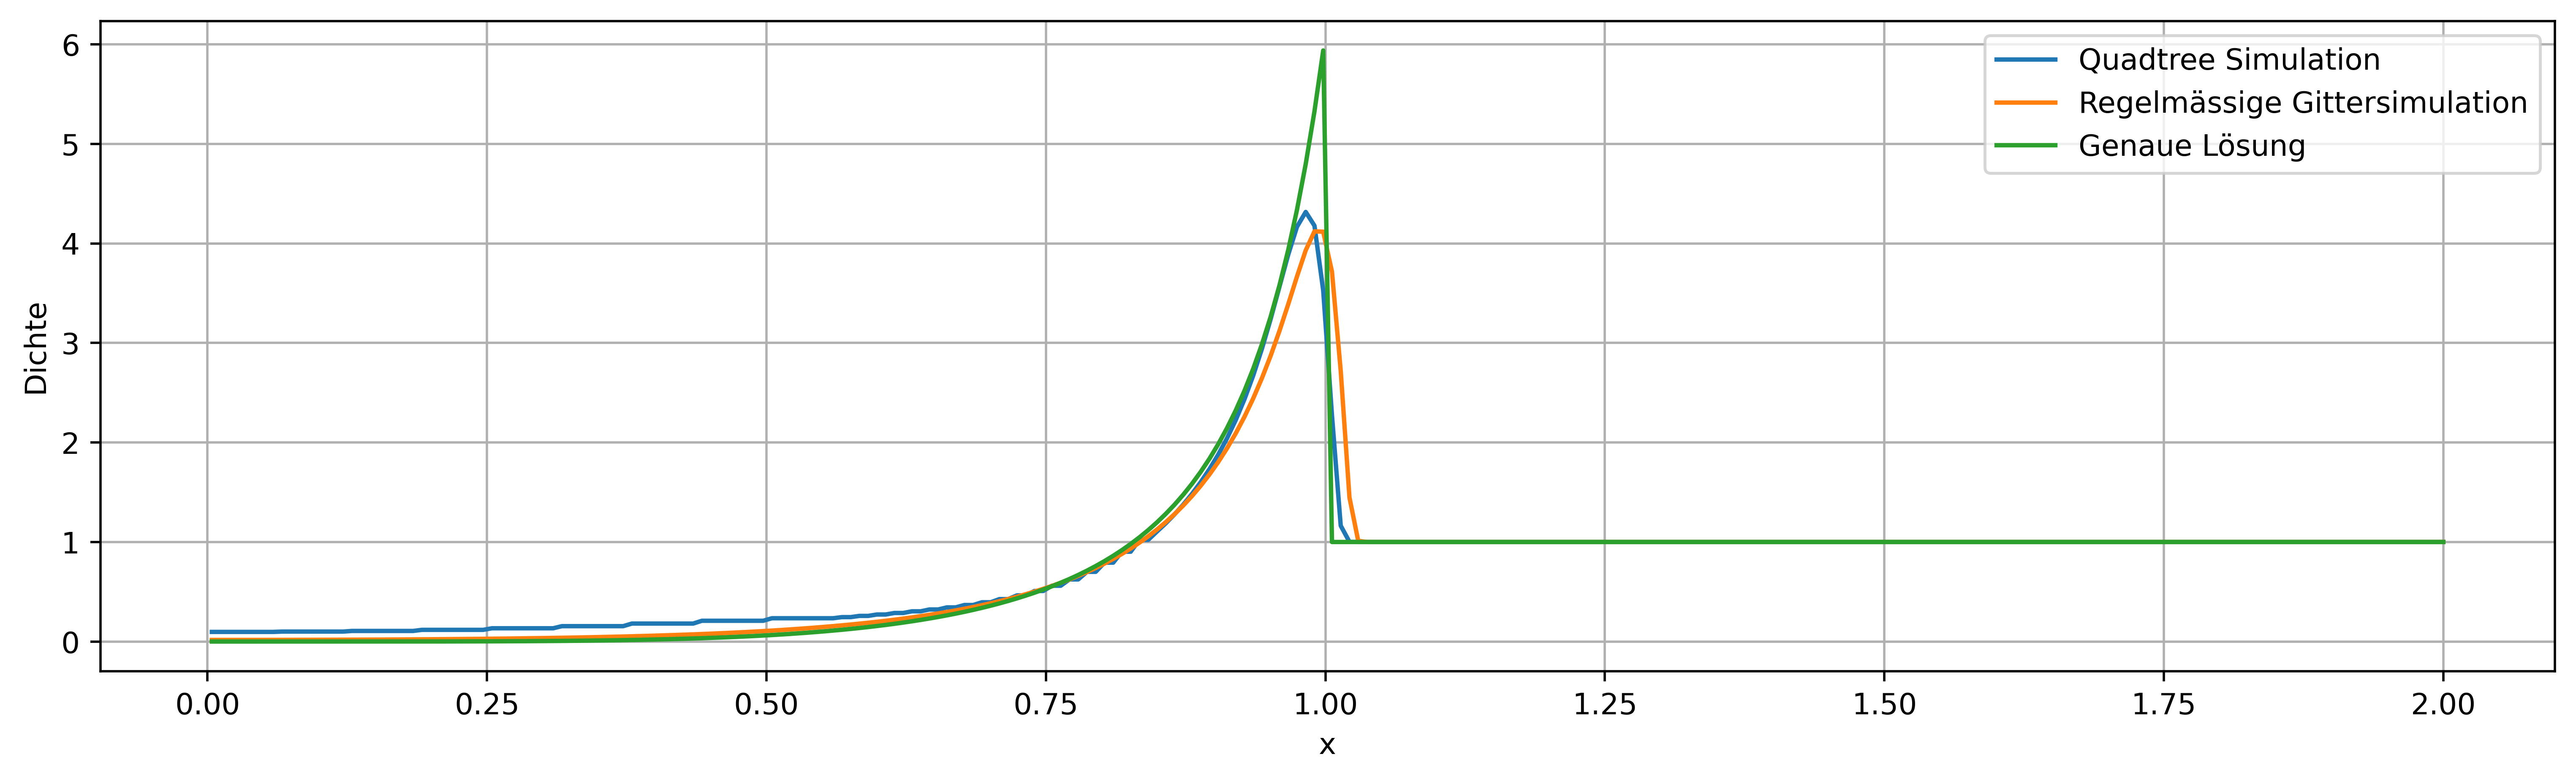

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from exactpack.solvers.riemann import IGEOS_Solver
from exactpack.solvers.sedov import Sedov 

def half(v):
    return v[v.shape[0]//2:]

plt.figure(figsize=(15, 4), dpi=500)
# Load simulation data
v = np.load("tests\quad_blast_no_tvd\quadtree_res512.npz")
v2 = np.load("tests\std_blast_no_tvd\stdres_res512.npz")

all_states = v["all_states"]
all_times = v["all_times"]

all_states2 = v2["all_states"]
all_times2 = v2["all_times"]

# Prepare x and y data from the simulation
cp = all_states[-1,0].copy()
idx = np.diag_indices(cp.shape[0])

cp2 = all_states2[-1,0].copy()
idx = np.diag_indices(cp.shape[0])

# take half of diagonal for blast
x = half(np.linspace(-2., 2., all_states[0][0].shape[0]))
y = half(cp[::-1][idx])

x2 = half(np.linspace(-2., 2., all_states2[0][0].shape[0]))
y2 = half(cp2[::-1][idx])

# #Sod
# x = (np.linspace(0., 1., all_states[0][0].shape[0]))
# y = (cp[::-1][idx])

# x2 = (np.linspace(0., 1., all_states2[0][0].shape[0]))
# y2 = (cp2[::-1][idx])

# Plot the simulation data
plt.plot(x, y, label="Quadtree Simulation")

# Plot the simulation data
plt.plot(x2, y2, label="Regelmässige Gittersimulation")

## Sod
# Prepare x and y data for the exact solution
# xvec = x
# solver = IGEOS_Solver( 
#                     rl=1.0,   ul=0.,   pl=1.0,  gl=1.4,
#                     rr=0.125, ur=0.,   pr=0.1,  gr=1.4,
#                     xmin=0.,  xd0=0.5, xmax=1., t=0.168
#                 )
# solu = solver._run(xvec, t=0.168)
# plt.plot(xvec, solu["density"], label="Exact Solution")


## Sedov
xvec = x
solver = Sedov(geometry=2,gamma=1.4,eblast=0.979264)
solu = solver._run(xvec,1)
plt.plot(xvec,solu["density"], label="Genaue Lösung")

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel("x")
plt.ylabel("Dichte")
# plt.title("Dichteprofilvergleich")

# Add legend
plt.legend()


# Save the figure as an SVG file
# plt.savefig("density_profile_comparison.svg", format="svg")

# Display the plot
plt.show()


(10.589560008602914, 17.75680792947744)

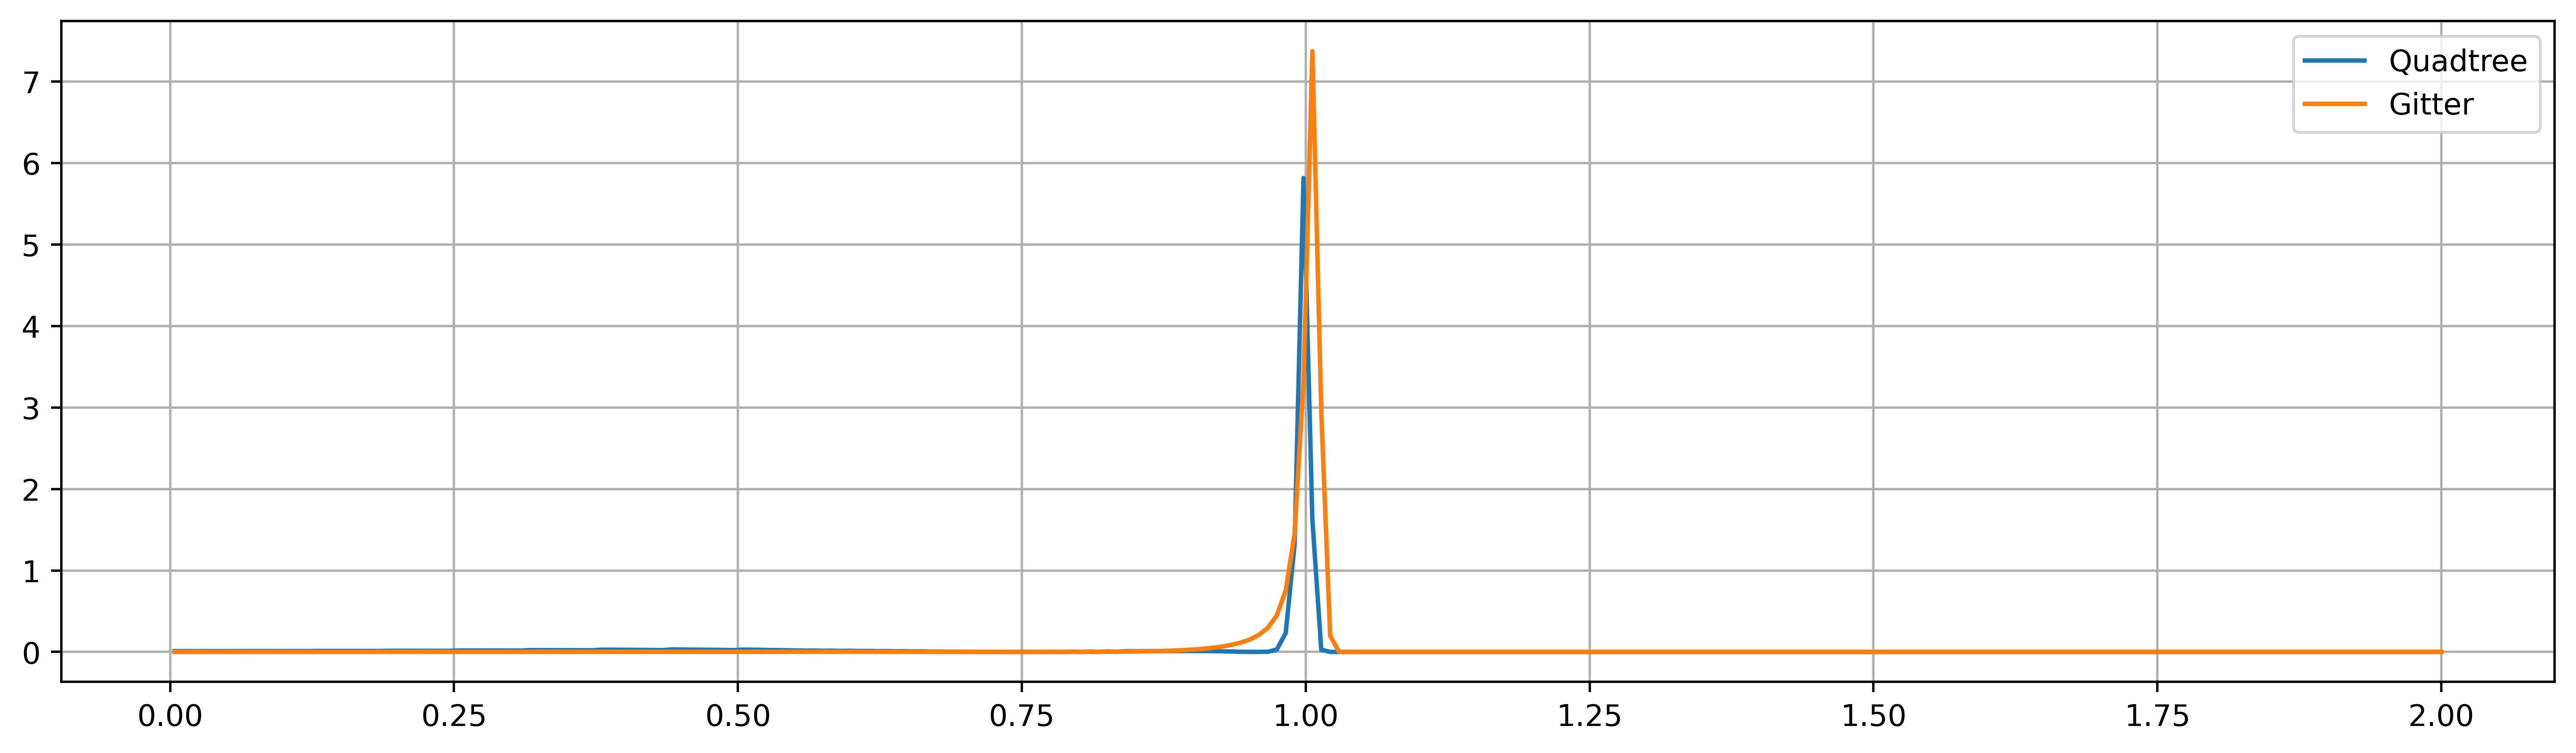

In [10]:
## Squared error
plt.figure(figsize=(15, 4), dpi=500)
plt.plot(x, ((solu["density"] - y) ** 2), label="Quadtree")
plt.plot(x2, ((solu["density"] - y2) ** 2), label="Gitter")
plt.grid(True)
plt.legend()
np.sum(((solu["density"] - y) ** 2)), np.sum(((solu["density"] - y2) ** 2))

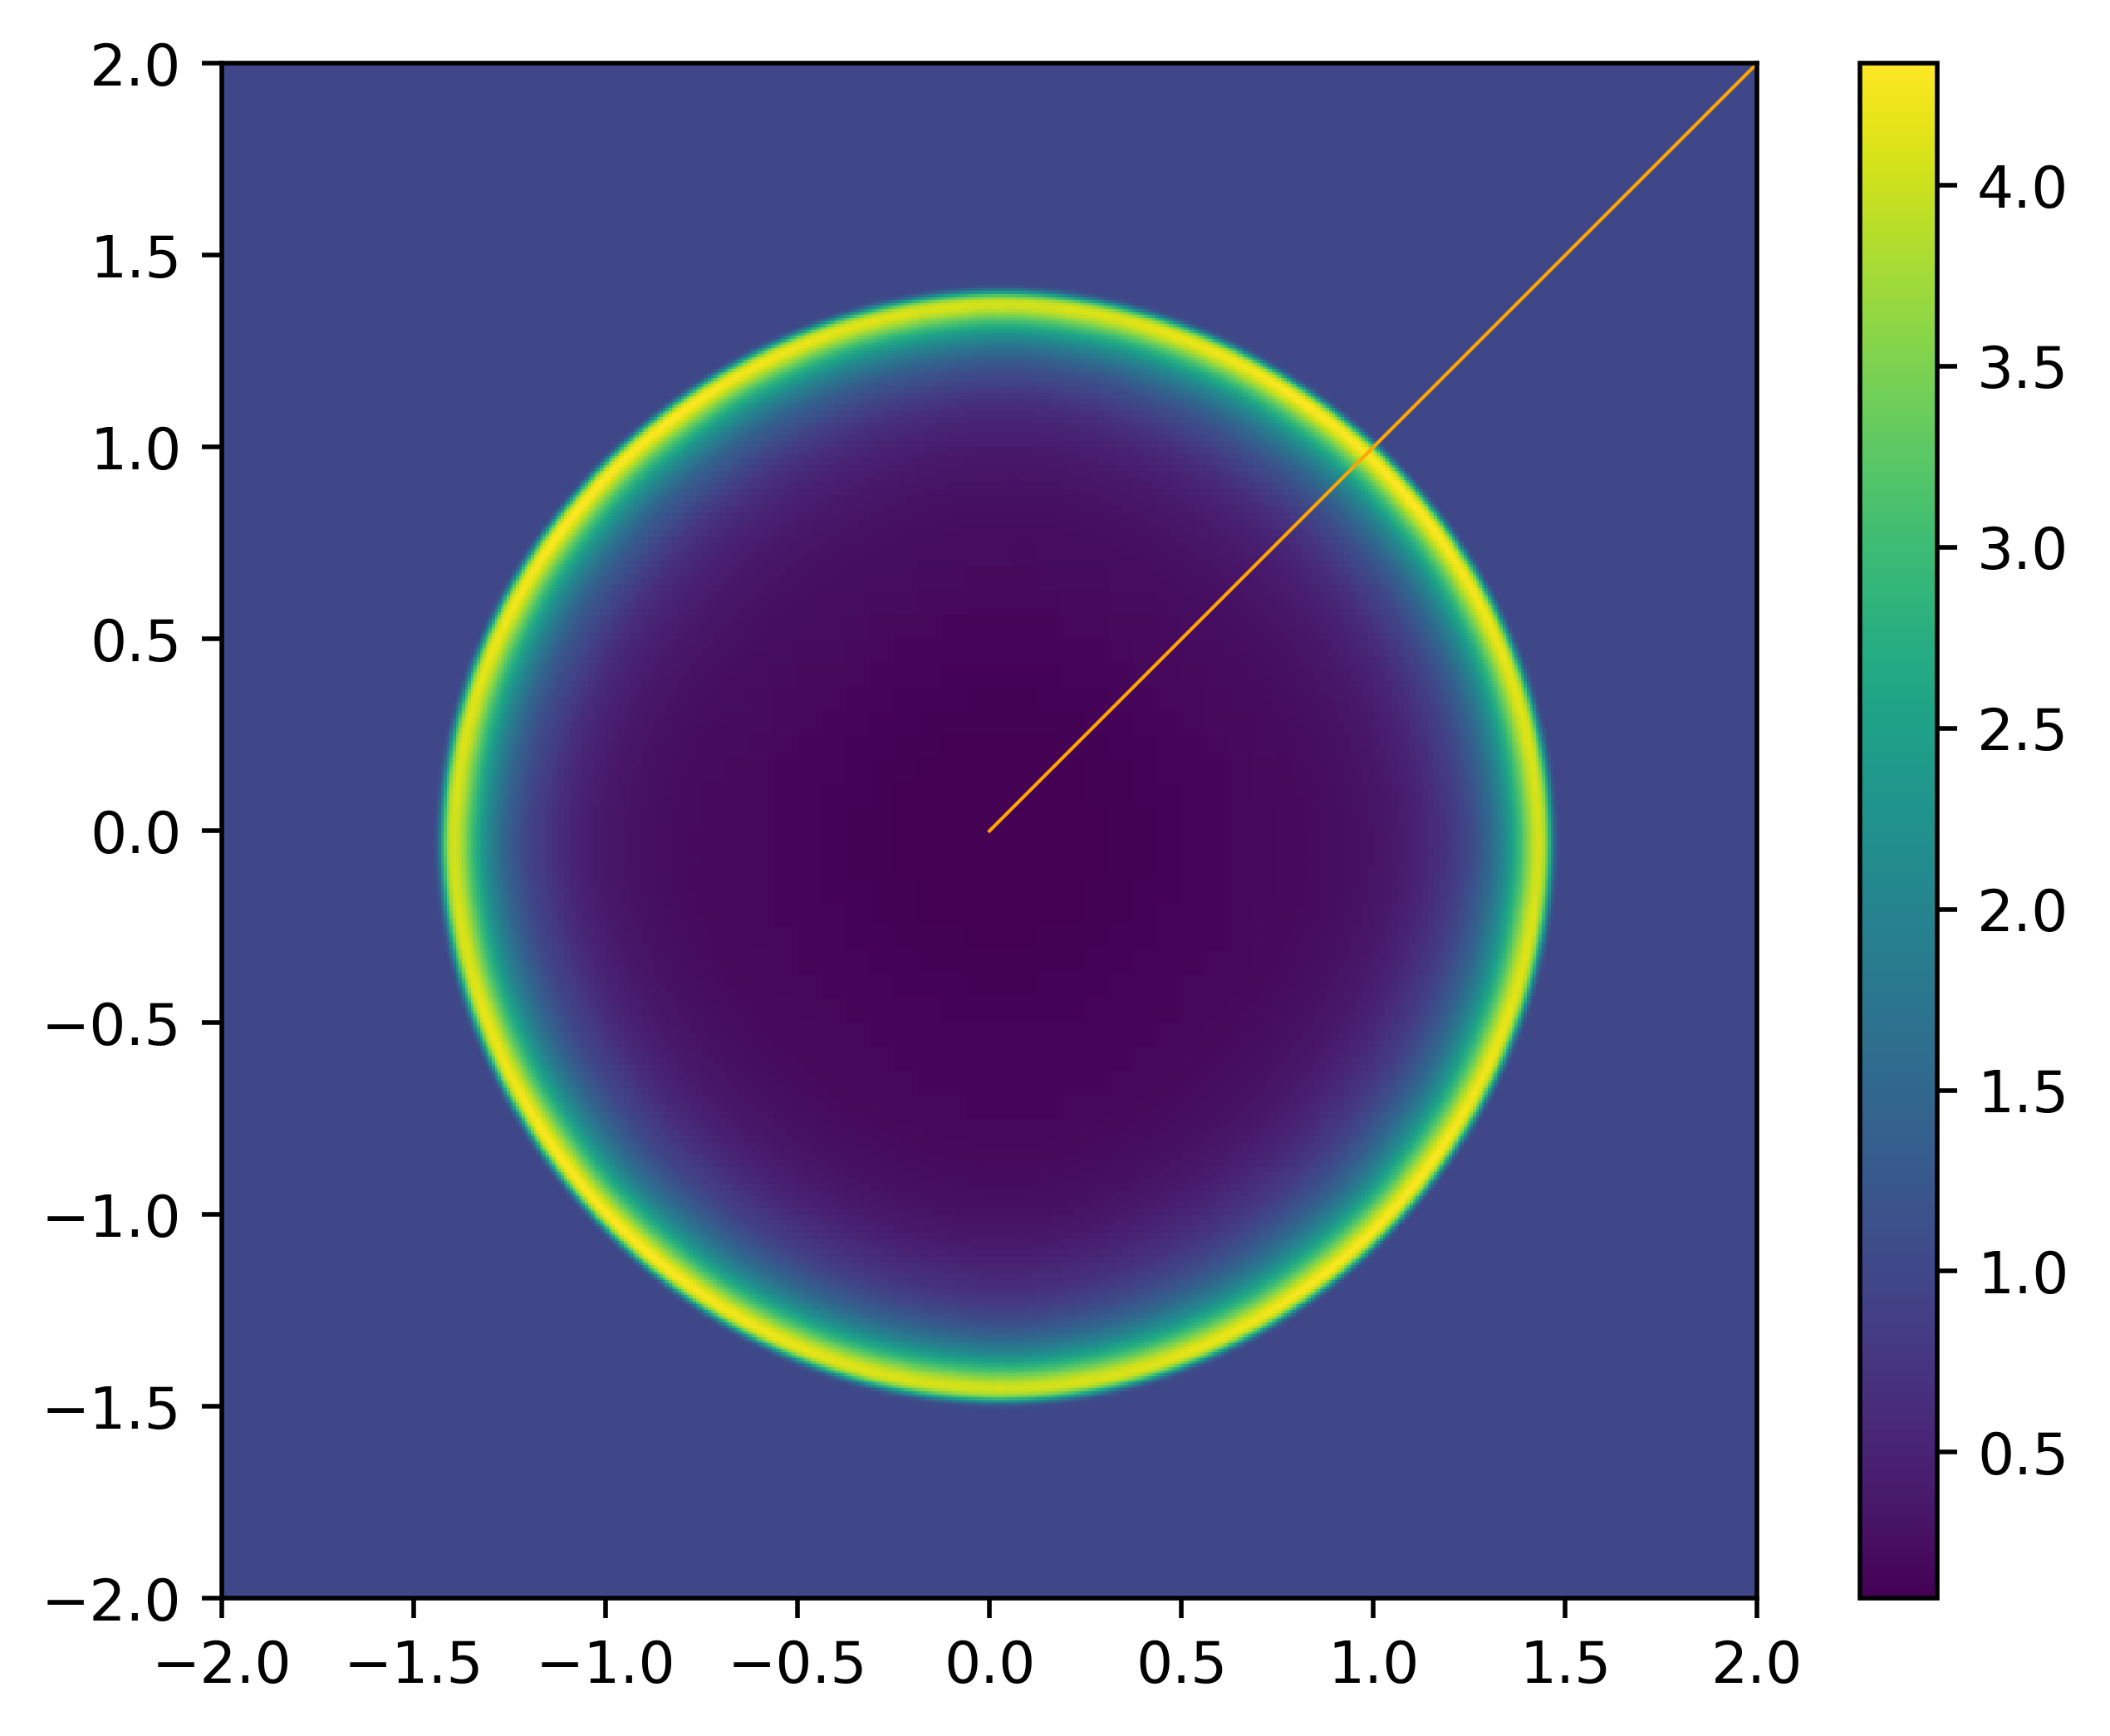

In [17]:
cp = all_states[-1, 0].copy()
plt.figure(dpi=500)
plt.imshow(cp, extent=(-2, 2, -2, 2))
plt.colorbar()

# Draw a diagonal line overlay
x_vals = np.linspace(0, 2, cp.shape[0])
y_vals = x_vals
plt.plot(x_vals, y_vals, color='orange', linewidth=0.6)  
plt.show()


<Figure size 7500x2000 with 0 Axes>

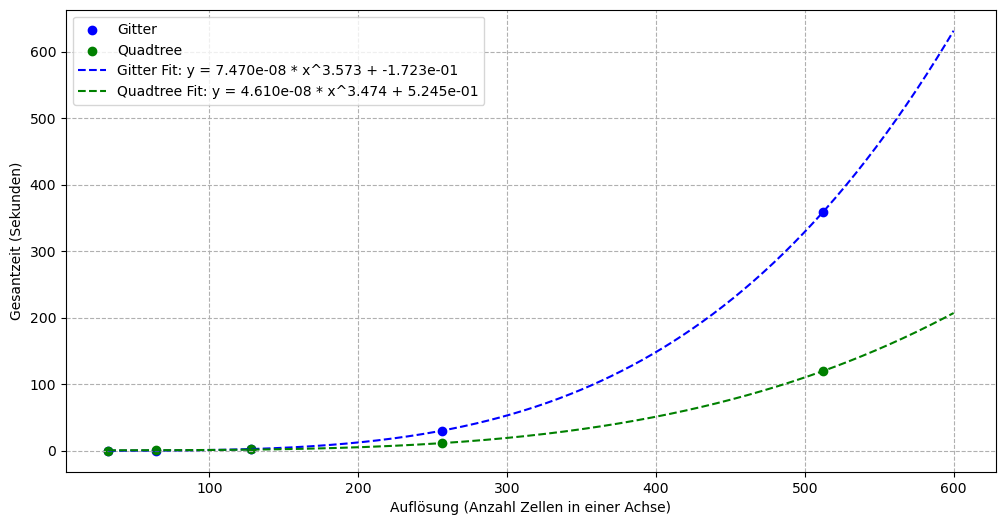

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=(15, 4), dpi=500)
perf = np.load("tests\quad_tube_no_tvd_proper\profiling_times.npz")
perf2 = np.load("tests\std_tube_no_tvd\profiling_times.npz")

# Data for Quadtree
res_quadtree = perf["res"]
time_quadtree = perf["times"]

# Data for STDRES
res_stdres = perf2["res"]
time_stdres = perf2["times"]

# Define the model function for curve fitting: y = a * x^b + c
def model_func(x, a, b, c):
    return a * x ** b + c

# Fit the STDRES data
params_stdres, _ = curve_fit(model_func, res_stdres, time_stdres)
a_stdres, b_stdres, c_stdres = params_stdres

# Fit the QUADTREE data
params_quadtree, _ = curve_fit(model_func, res_quadtree, time_quadtree)
a_quadtree, b_quadtree, c_quadtree = params_quadtree

# Generate resolution values up to 5000 for plotting the fitted curves
res_extended = np.linspace(min(res_stdres.min(), res_quadtree.min()), 600, 500)

# Calculate the fitted times using the model function
fitted_time_stdres = model_func(res_extended, a_stdres, b_stdres, c_stdres)
fitted_time_quadtree = model_func(res_extended, a_quadtree, b_quadtree, c_quadtree)

# Plotting
plt.figure(figsize=(12, 6))

# Plot STDRES data points
plt.scatter(res_stdres, time_stdres, color='blue', label='Gitter')

# Plot QUADTREE data points
plt.scatter(res_quadtree, time_quadtree, color='green', label='Quadtree')

# Plot fitted curves
plt.plot(res_extended, fitted_time_stdres, color='blue', linestyle='--', label=f'Gitter Fit: y = {a_stdres:.3e} * x^{b_stdres:.3f} + {c_stdres:.3e}')
plt.plot(res_extended, fitted_time_quadtree, color='green', linestyle='--', label=f'Quadtree Fit: y = {a_quadtree:.3e} * x^{b_quadtree:.3f} + {c_quadtree:.3e}')

# Logarithmic scale for better visualization
# plt.yscale('log')
# plt.xscale('symlog')

# Labels and title
plt.xlabel('Auflösung (Anzahl Zellen in einer Achse)')
plt.ylabel('Gesantzeit (Sekunden)')
# plt.title('Plot von Grid Space und Quadtree Timings ohne TVD')
plt.legend()
plt.grid(True, which="both", ls="--")

# Show the plot
plt.show()

In [10]:
from scipy.optimize import fsolve
fsolve(lambda x: model_func(x, a_stdres, b_stdres, c_stdres)-model_func(x, a_quadtree, b_quadtree, c_quadtree),[150.0])

array([145.66176352])

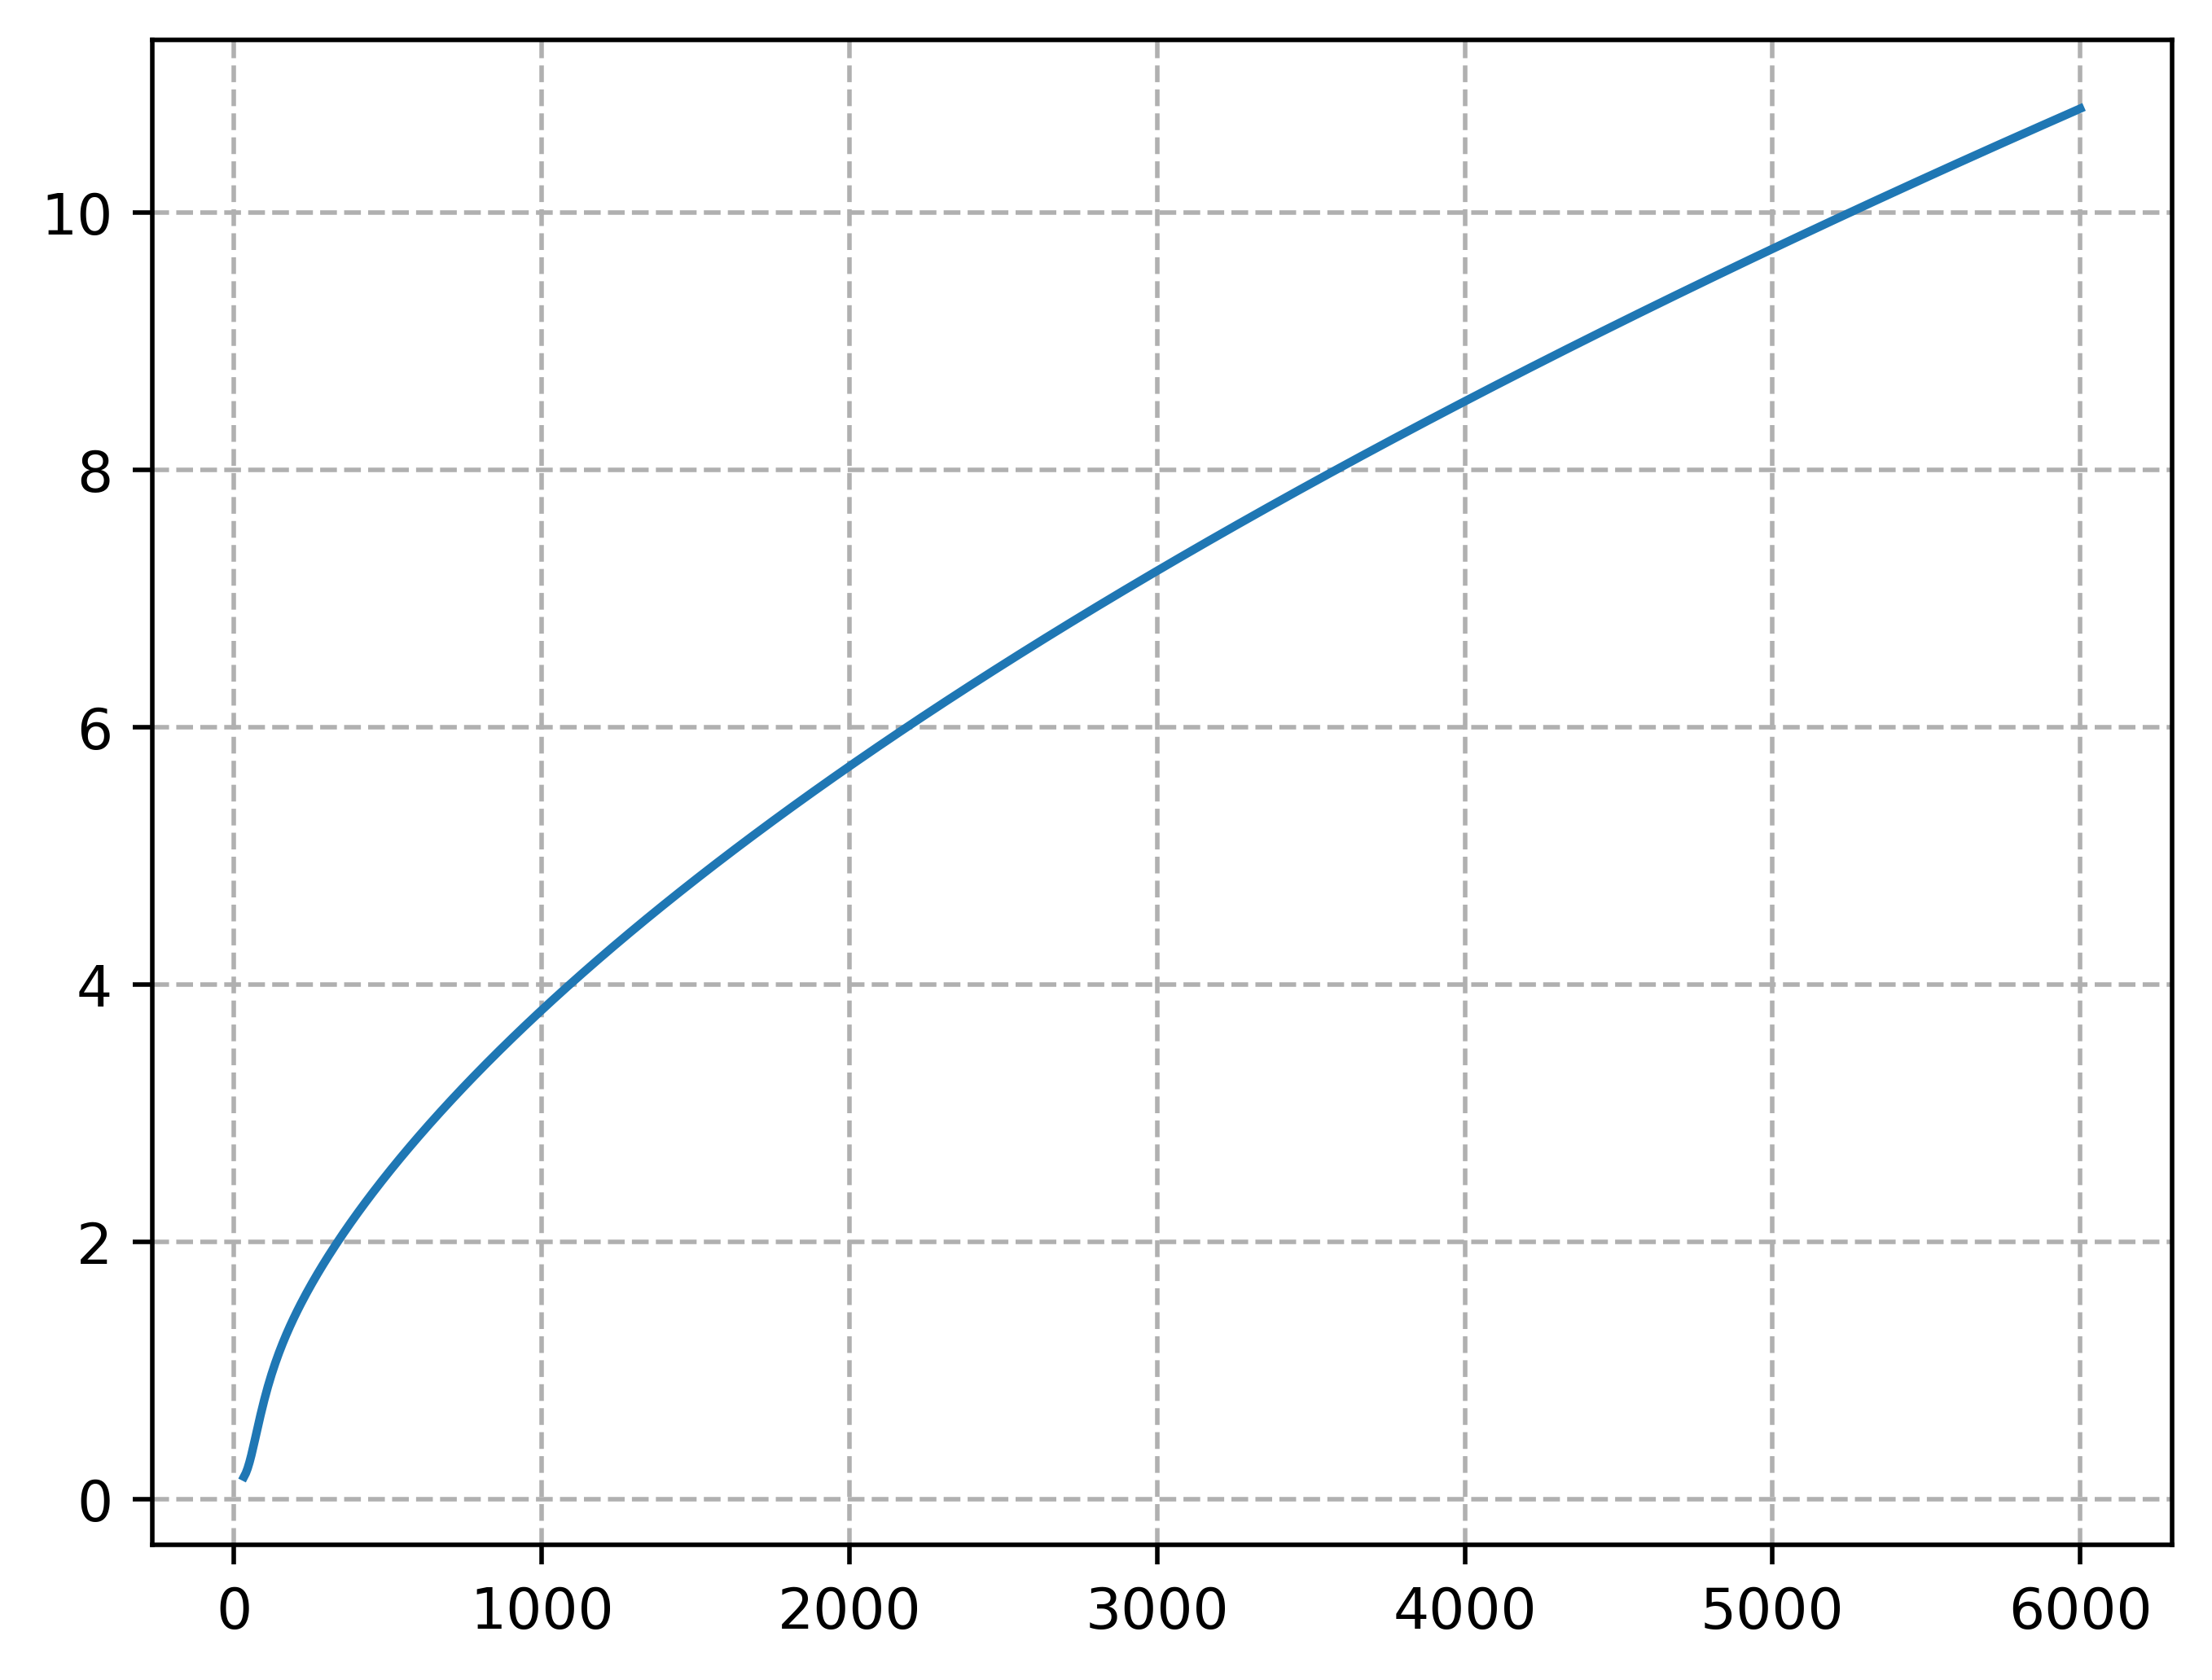

In [20]:
plt.figure(dpi=500)
plt.grid(True, which="both", ls="--")
x = np.linspace(min(res_stdres.min(), res_quadtree.min()), 6000, 1000)
#time ratio
plt.plot(x, model_func(x, a_stdres, b_stdres, c_stdres)/model_func(x, a_quadtree, b_quadtree, c_quadtree))

0.2543373107910156


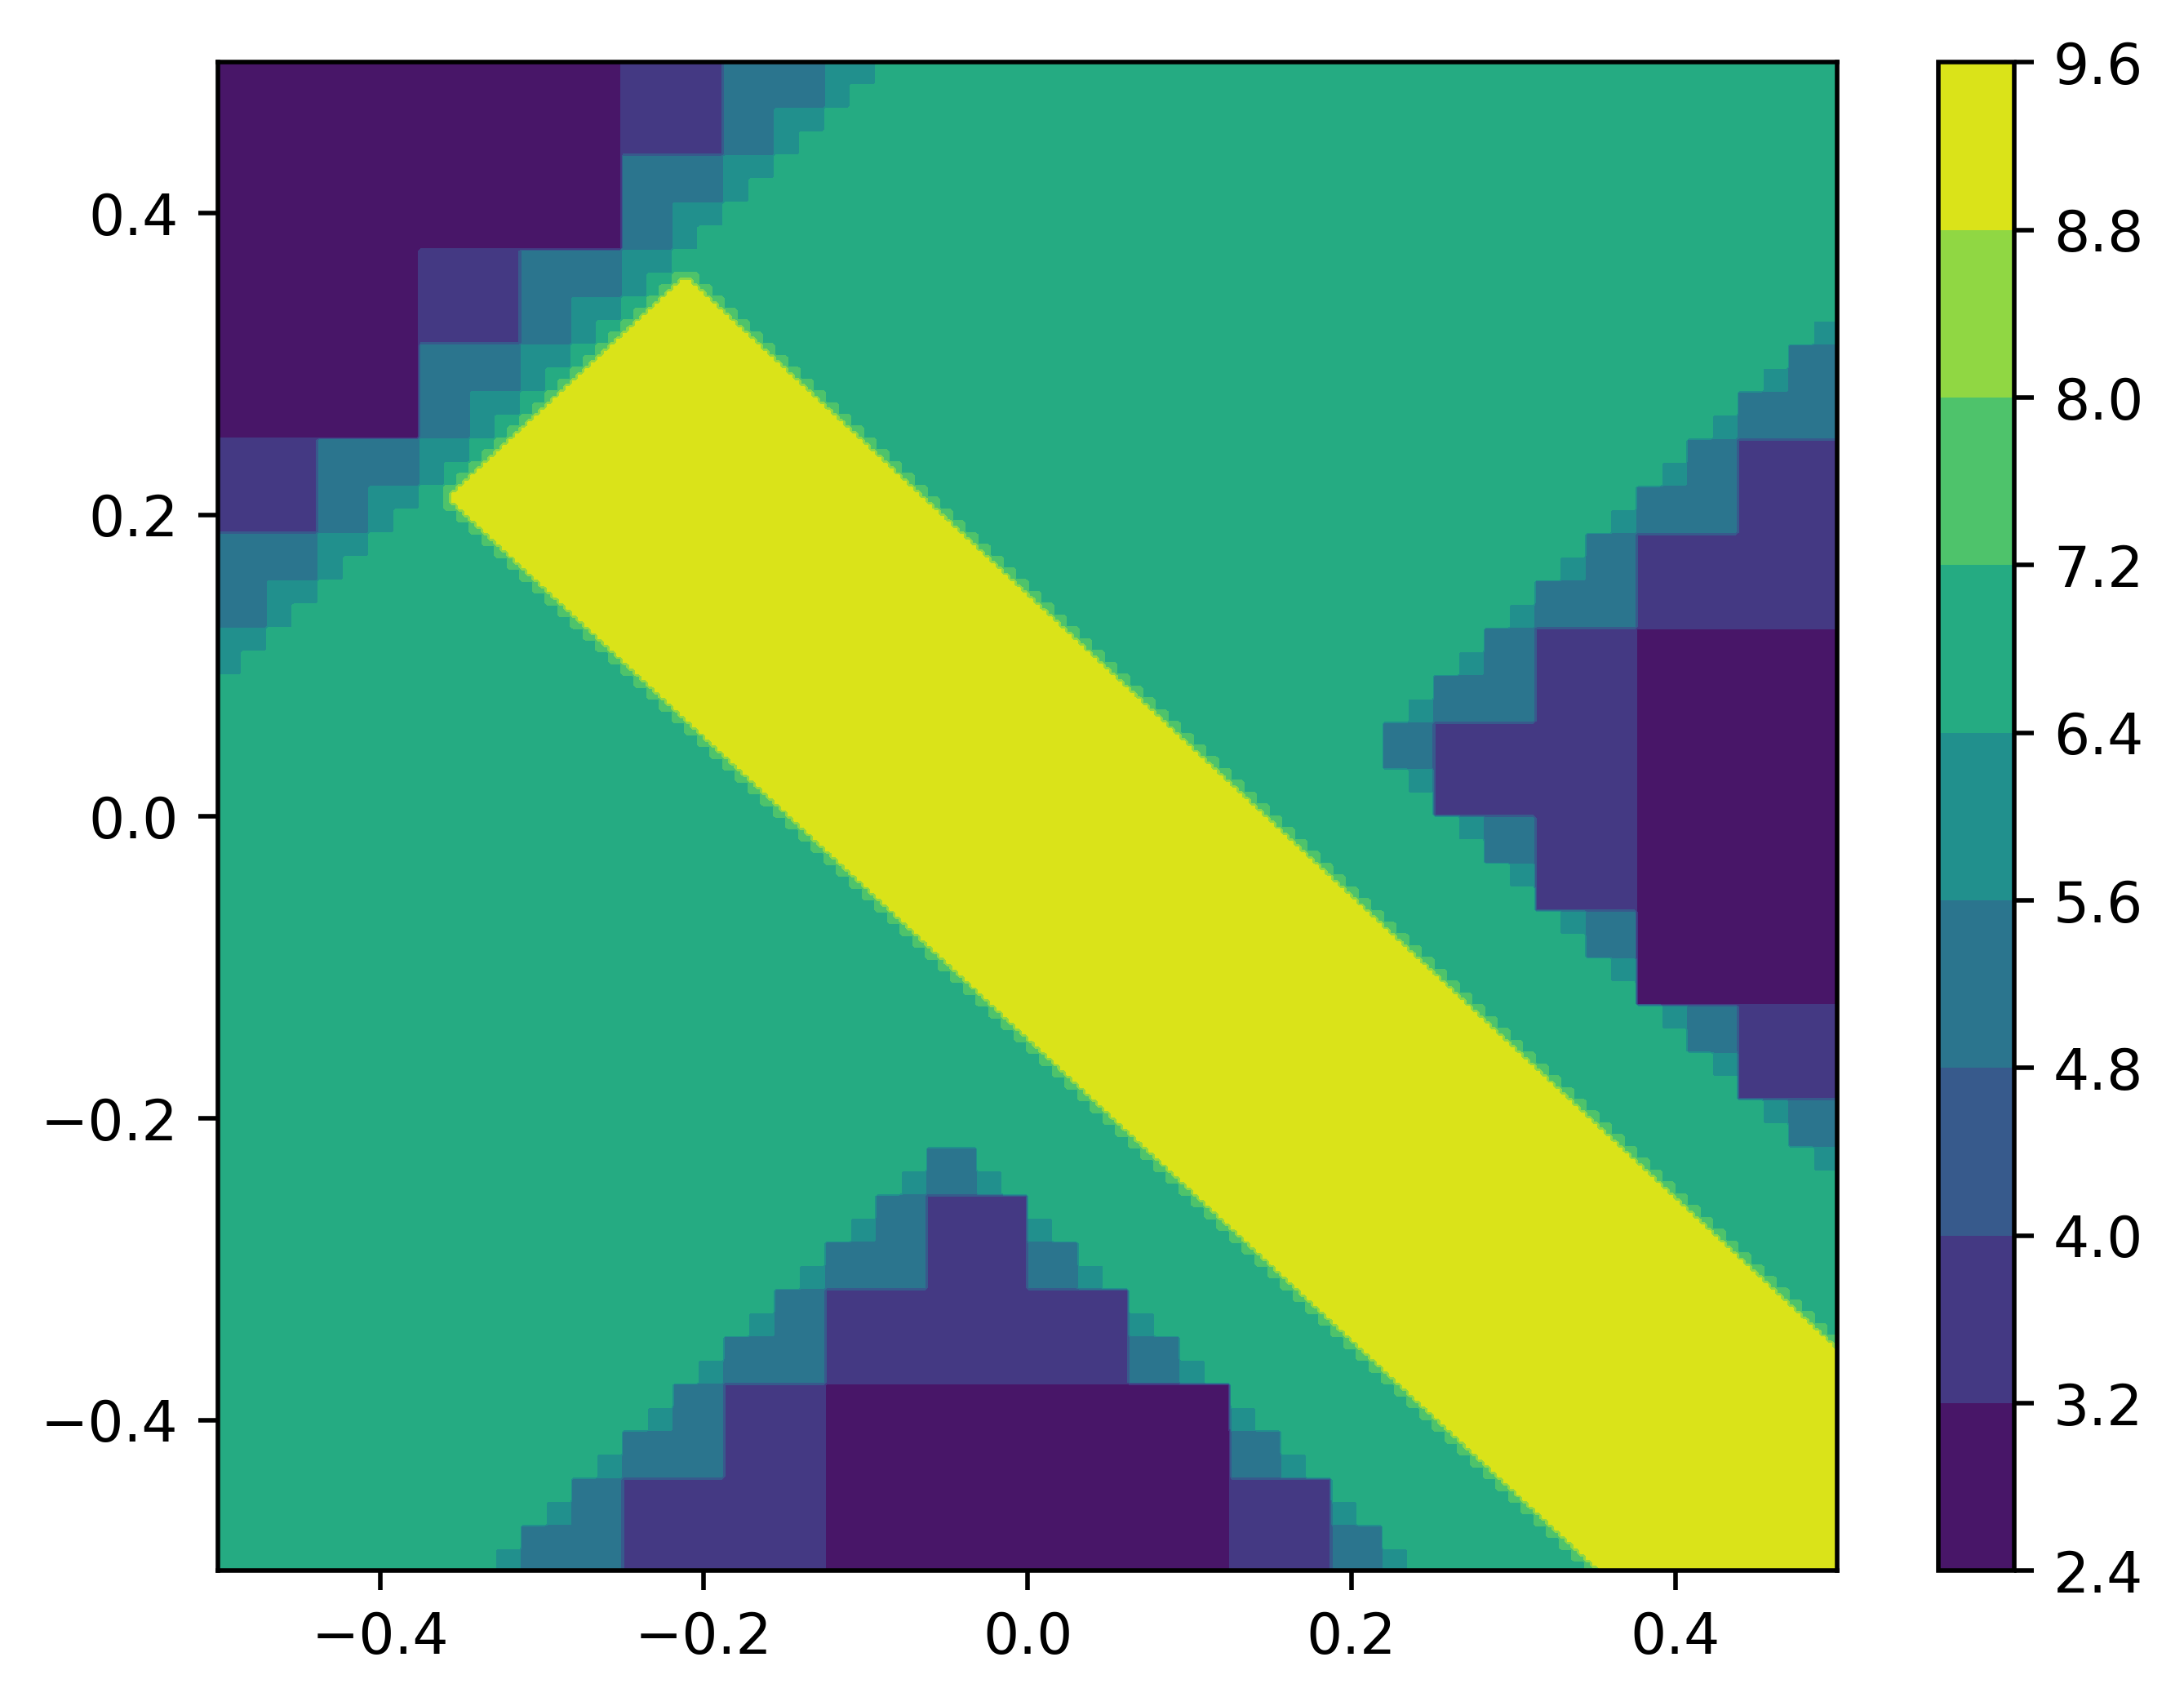

In [21]:
from quadtree_helper import read_sqmatrix_from_file,read_nodes_from_file
import matplotlib.pyplot as plt
import numpy as np
plt.figure(dpi=500)

# depth,_,_ = read_nodes_from_file(file_name="tests/quad_tube_tvd_proper/Qtdata_res512/nodes_data.txt")
depth,_,_ = read_nodes_from_file()
depth = np.array(depth)
# sq = read_sqmatrix_from_file(file_name="tests/quad_tube_tvd_proper/Qtdata_res512/sqmatrix_data.txt")
sq = read_sqmatrix_from_file()
print(len(depth)/np.prod(sq.shape))
plt.contourf(depth[sq],extent=np.array([-0.5,0.5,-0.5,0.5]),cmap="viridis")
plt.colorbar()


In [93]:
start_depth = 5
end_depth = 9

std_resolutions = [2**i for i in range(start_depth, end_depth+1)]
quadtree_resolutions = [2**i for i in range(start_depth, end_depth+1)]
depth_formula_sedov = "sedov"
depth_formula_sod = "sod"
faulty1 = "sod 2"
faulty2 = "sod 3"

def half(v):
    return v[v.shape[0]//2:]

combinations = [
    # folder, space-type, resolutions, tvd/no-tvd, test, depth_func, torch
    # Blast
    ## STDRES
    ["tests/std_blast_no_tvd", "std", std_resolutions, False, "blast", None, False],
    ["tests/std_blast_tvd", "std", std_resolutions, True, "blast", None, False],
    ## QUAD
    ["tests/quad_blast_no_tvd", "quad", quadtree_resolutions, False, "blast", depth_formula_sedov, False],
    ["tests/quad_blast_tvd", "quad", quadtree_resolutions, True, "blast", depth_formula_sedov, False],

    # Tube
    ## STDRES
    ["tests/std_tube_no_tvd", "std", std_resolutions, False, "tube", None, False],
    ["tests/std_tube_tvd", "std", std_resolutions, True, "tube", None, False],
    ## QUAD: proper
    ["tests/quad_tube_no_tvd_proper", "quad", quadtree_resolutions, False, "tube", depth_formula_sod, False],
    ["tests/quad_tube_tvd_proper", "quad", quadtree_resolutions, True, "tube", depth_formula_sod, False],
    ## QUAD: faulty1
    ["tests/quad_tube_no_tvd_faulty1", "quad", quadtree_resolutions, False, "tube", faulty1, False],
    ["tests/quad_tube_tvd_faulty1", "quad", quadtree_resolutions, True, "tube", faulty1, False],
    ## QUAD: faulty2
    ["tests/quad_tube_no_tvd_faulty2", "quad", quadtree_resolutions, False, "tube", faulty2, False],
    ["tests/quad_tube_tvd_faulty2", "quad", quadtree_resolutions, True, "tube", faulty2, False],
]


table = {}

for (folder, space_type, resolutions, tvd, test, depth_func, use_torch) in combinations:
    spacen = "quadtree" if space_type == "quad" else "stdres"
    tvdn = "tvd" if tvd else "no tvd"
    base = folder
    saves = [f"{base}/{spacen}_res{res}.npz" for res in resolutions]

    if test == "tube":
        solver = IGEOS_Solver( 
                            rl=1.0,   ul=0.,   pl=1.0,  gl=1.4,
                            rr=0.125, ur=0.,   pr=0.1,  gr=1.4,
                            xmin=0.,  xd0=0.5, xmax=1., t=0.168
                        )
        time = 0.168
    elif test == "blast":
        solver = Sedov(geometry=2,gamma=1.4,eblast=0.979264)
        time = 1.0

    for simrun,res in zip(saves,resolutions):
        if test == "tube":
            x = np.linspace(0.,1.,res)
            do_half = lambda v: v
        elif test == "blast":
            x = np.linspace(0.,2.,res//2)
            do_half = half
        
        solu = solver._run(x,time)

        v = np.load(simrun)
        
        all_states = v["all_states"]

        cp = all_states[-1,0].copy()
        idx = np.diag_indices(cp.shape[0])
        y = do_half(cp[::-1][idx])
        
        L2 = np.sqrt(((y - solu["density"]) ** 2).sum() * 1/x.shape[0])

        depth_func = depth_func if depth_func is not None else ""
        args = (test, spacen, tvdn, depth_func)
        tb = table
        for val in args:
            if val not in tb:
                tb[val] = {}
            
            tb = tb[val]

        tb[res] = L2 

        print(f"{simrun}:{L2}")

print(table)

tests/std_blast_no_tvd/stdres_res32.npz:0.39249861144724313
tests/std_blast_no_tvd/stdres_res64.npz:0.4333989290585119
tests/std_blast_no_tvd/stdres_res128.npz:0.3986261212965856
tests/std_blast_no_tvd/stdres_res256.npz:0.3305069476060249
tests/std_blast_no_tvd/stdres_res512.npz:0.25102965365950947
tests/std_blast_tvd/stdres_res32.npz:0.31154659795598494
tests/std_blast_tvd/stdres_res64.npz:0.3259901920188665
tests/std_blast_tvd/stdres_res128.npz:0.2771908362631603
tests/std_blast_tvd/stdres_res256.npz:0.19040898710487295
tests/std_blast_tvd/stdres_res512.npz:0.09267488478987933
tests/quad_blast_no_tvd/quadtree_res32.npz:0.39245688488078867
tests/quad_blast_no_tvd/quadtree_res64.npz:0.45563276252005624
tests/quad_blast_no_tvd/quadtree_res128.npz:0.3714761749190371
tests/quad_blast_no_tvd/quadtree_res256.npz:0.2658668681636268
tests/quad_blast_no_tvd/quadtree_res512.npz:0.19119283251162794
tests/quad_blast_tvd/quadtree_res32.npz:0.3113332047131833
tests/quad_blast_tvd/quadtree_res64.npz

In [98]:
data = table

# Collect all sizes (integer keys at the deepest level)
def collect_sizes(d, sizes_set):
    if isinstance(d, dict):
        if all(isinstance(k, int) for k in d.keys()):
            sizes_set.update(d.keys())
        else:
            for v in d.values():
                collect_sizes(v, sizes_set)

sizes_set = set()
collect_sizes(data, sizes_set)
sizes = sorted(sizes_set)

# Traverse the dictionary and build rows for the table
def traverse_and_build_rows(d, path, rows, sizes):
    if isinstance(d, dict):
        if all(isinstance(k, int) for k in d.keys()):
            row = path.copy()
            for size in sizes:
                value = d.get(size, '')
                row.append(value)
            rows.append(row)
        else:
            for k, v in d.items():
                traverse_and_build_rows(v, path + [k], rows, sizes)
    else:
        pass

rows = []
traverse_and_build_rows(data, [], rows, sizes)

# Determine the maximum depth to standardize row lengths
paths = [row[:-len(sizes)] for row in rows]
max_depth = max(len(path) for path in paths)

# Prepare headers
headers = [f"Level {i+1}" for i in range(max_depth)] + [str(size) for size in sizes]

# Pad rows to ensure consistent length
for row in rows:
    path = row[:-len(sizes)]
    values = row[-len(sizes):]
    path += [''] * (max_depth - len(path))
    row[:] = path + [str(value) if value != '' else '' for value in values]

# Generate the markdown table
def generate_markdown_table(headers, rows):
    header_line = '| ' + ' | '.join(headers) + ' |'
    separator_line = '| ' + ' | '.join(['---'] * len(headers)) + ' |'
    table_lines = [header_line, separator_line]
    for row in rows:
        row_line = '| ' + ' | '.join(str(cell) for cell in row) + ' |'
        table_lines.append(row_line)
    return '\n'.join(table_lines)

markdown_table = generate_markdown_table(headers, rows)
print(markdown_table)

| Level 1 | Level 2 | Level 3 | Level 4 | 32 | 64 | 128 | 256 | 512 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| blast | stdres | no tvd |  | 0.036499 | 0.17533870000000004 | 1.5276866999999996 | 44.26726200000002 | 774.2083349999999 |
| blast | stdres | tvd |  | 0.10495890000000006 | 0.8126819000000002 | 15.6914521 | 280.2080584 | 4815.982751199998 |
| blast | quadtree | no tvd | sedov | 0.10665540000000005 | 0.6436083999999999 | 2.8685395999999996 | 22.7999964 | 201.66678300000004 |
| blast | quadtree | tvd | sedov | 0.4583688 | 2.7756099000000005 | 13.114035100000008 | 83.2609206 | 872.8218489000004 |
| tube | stdres | no tvd |  | 0.03405830000000002 | 0.17579880000000006 | 1.9741254000000001 | 29.9919596 | 358.1490592 |
| tube | stdres | tvd |  | 0.09449980000000002 | 0.5611941000000001 | 7.4967102000000025 | 86.411759 | 1050.2010559000003 |
| tube | quadtree | no tvd | sod | 0.13745439999999998 | 0.6199922 | 1.9533121999999998 | 11.148314200000002 | 119.485699499999

In [97]:
start_depth = 5
end_depth = 9

std_resolutions = [2**i for i in range(start_depth, end_depth+1)]
quadtree_resolutions = [2**i for i in range(start_depth, end_depth+1)]
depth_formula_sedov = "sedov"
depth_formula_sod = "sod"
faulty1 = "sod 2"
faulty2 = "sod 3"

def half(v):
    return v[v.shape[0]//2:]

combinations = [
    # folder, space-type, resolutions, tvd/no-tvd, test, depth_func, torch
    # Blast
    ## STDRES
    ["tests/std_blast_no_tvd", "std", std_resolutions, False, "blast", None, False],
    ["tests/std_blast_tvd", "std", std_resolutions, True, "blast", None, False],
    ## QUAD
    ["tests/quad_blast_no_tvd", "quad", quadtree_resolutions, False, "blast", depth_formula_sedov, False],
    ["tests/quad_blast_tvd", "quad", quadtree_resolutions, True, "blast", depth_formula_sedov, False],

    # Tube
    ## STDRES
    ["tests/std_tube_no_tvd", "std", std_resolutions, False, "tube", None, False],
    ["tests/std_tube_tvd", "std", std_resolutions, True, "tube", None, False],
    ## QUAD: proper
    ["tests/quad_tube_no_tvd_proper", "quad", quadtree_resolutions, False, "tube", depth_formula_sod, False],
    ["tests/quad_tube_tvd_proper", "quad", quadtree_resolutions, True, "tube", depth_formula_sod, False],
    ## QUAD: faulty1
    ["tests/quad_tube_no_tvd_faulty1", "quad", quadtree_resolutions, False, "tube", faulty1, False],
    ["tests/quad_tube_tvd_faulty1", "quad", quadtree_resolutions, True, "tube", faulty1, False],
    ## QUAD: faulty2
    ["tests/quad_tube_no_tvd_faulty2", "quad", quadtree_resolutions, False, "tube", faulty2, False],
    ["tests/quad_tube_tvd_faulty2", "quad", quadtree_resolutions, True, "tube", faulty2, False],
]


table = {}

for (folder, space_type, resolutions, tvd, test, depth_func, use_torch) in combinations:
    spacen = "quadtree" if space_type == "quad" else "stdres"
    tvdn = "tvd" if tvd else "no tvd"
    base = folder
    # saves = [f"{base}/{spacen}_res{res}.npz" for res in resolutions]
    saves = f"{base}/profiling_times.npz"

    v = np.load(saves)

    # if test == "tube":
    #     solver = IGEOS_Solver( 
    #                         rl=1.0,   ul=0.,   pl=1.0,  gl=1.4,
    #                         rr=0.125, ur=0.,   pr=0.1,  gr=1.4,
    #                         xmin=0.,  xd0=0.5, xmax=1., t=0.168
    #                     )
    #     time = 0.168
    # elif test == "blast":
    #     solver = Sedov(geometry=2,gamma=1.4,eblast=0.979264)
    #     time = 1.0

    for res in resolutions:
        


        depth_func = depth_func if depth_func is not None else ""
        args = (test, spacen, tvdn, depth_func)
        tb = table
        for val in args:
            if val not in tb:
                tb[val] = {}
            
            tb = tb[val]
        idx = v["res"] == res
        tb[res] = float(v["times"][idx])

        print(f"{base}/{spacen}_res{res}:{tb[res]}")

print(table)

tests/std_blast_no_tvd/stdres_res32:0.036499
tests/std_blast_no_tvd/stdres_res64:0.17533870000000004
tests/std_blast_no_tvd/stdres_res128:1.5276866999999996
tests/std_blast_no_tvd/stdres_res256:44.26726200000002
tests/std_blast_no_tvd/stdres_res512:774.2083349999999
tests/std_blast_tvd/stdres_res32:0.10495890000000006
tests/std_blast_tvd/stdres_res64:0.8126819000000002
tests/std_blast_tvd/stdres_res128:15.6914521
tests/std_blast_tvd/stdres_res256:280.2080584
tests/std_blast_tvd/stdres_res512:4815.982751199998
tests/quad_blast_no_tvd/quadtree_res32:0.10665540000000005
tests/quad_blast_no_tvd/quadtree_res64:0.6436083999999999
tests/quad_blast_no_tvd/quadtree_res128:2.8685395999999996
tests/quad_blast_no_tvd/quadtree_res256:22.7999964
tests/quad_blast_no_tvd/quadtree_res512:201.66678300000004
tests/quad_blast_tvd/quadtree_res32:0.4583688
tests/quad_blast_tvd/quadtree_res64:2.7756099000000005
tests/quad_blast_tvd/quadtree_res128:13.114035100000008
tests/quad_blast_tvd/quadtree_res256:83.26

C:\Users\Soham's laptop\AppData\Local\Temp\ipykernel_5064\3354378412.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tb[res] = float(v["times"][idx])


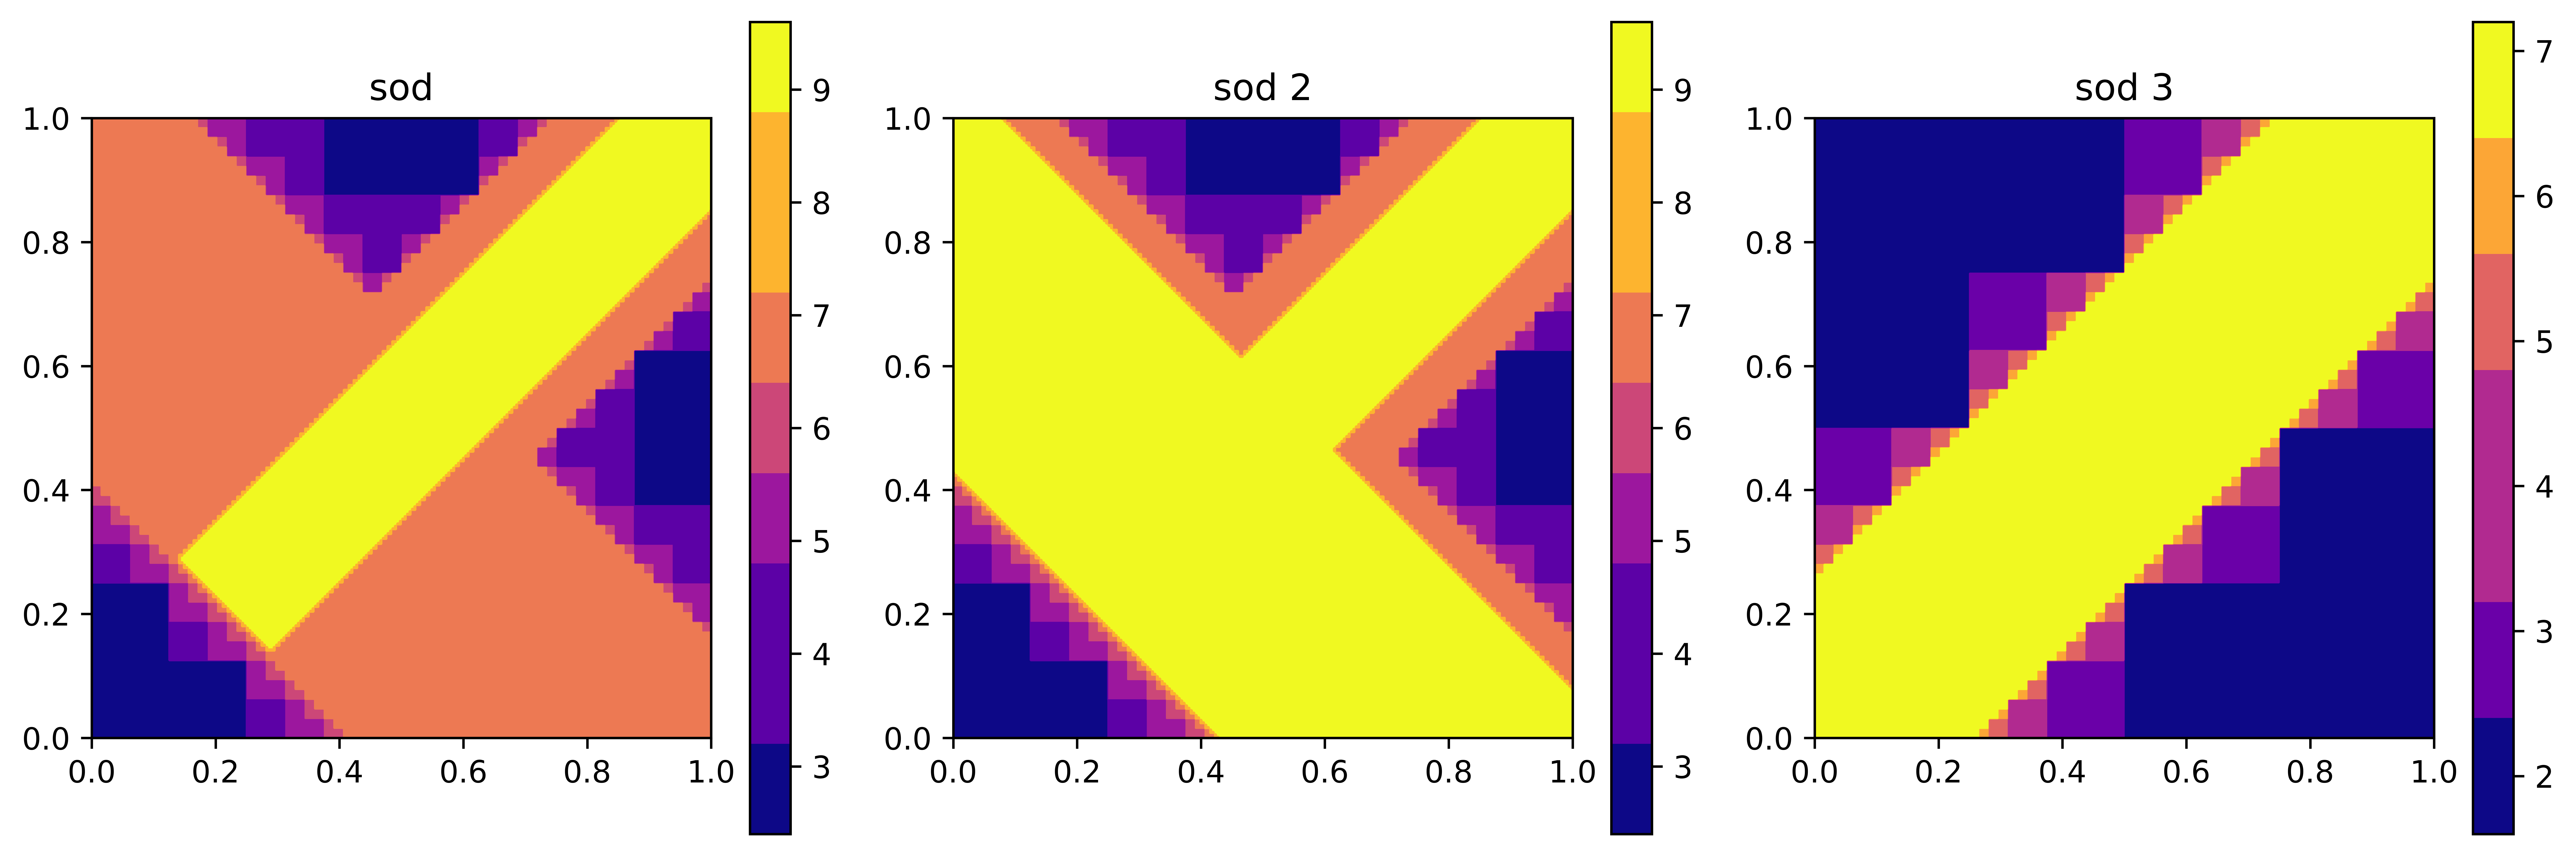

In [1]:
from quadtree_helper import read_nodes_from_file, read_sqmatrix_from_file
import numpy as np
import matplotlib.pyplot as plt

# Base paths and parameters
base0 = "tests/quad_tube_no_tvd_proper/Qtdata_res512"
base1 = "tests/quad_tube_no_tvd_faulty1/Qtdata_res512"
base2 = "tests/quad_tube_no_tvd_faulty2/Qtdata_res512"
names = ["sod", "sod 2", "sod 3"]
filep = [base0, base1, base2]
nodes = "nodes_data.txt"
sqn = "sqmatrix_data.txt"

# Create subplots for side-by-side figures with square dimensions
fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=1000)

for i in range(3):
    base = filep[i]
    depth, _, _ = read_nodes_from_file(f"{base}/{nodes}")
    sq = np.array(read_sqmatrix_from_file(f"{base}/{sqn}"))
    depth = np.array(depth)

    # Plot each figure in a subplot
    ax = axs[i]
    ax.set_title(names[i])
    cmap = plt.get_cmap('plasma', np.max(depth[sq]) - np.min(depth[sq]) + 1)
    contour = ax.contourf(depth[sq][::-1], extent=(0, 1, 0, 1), cmap=cmap,
                          vmin=np.min(depth[sq]) - 0.5, vmax=np.max(depth[sq]) + 0.5)
    
    # Ensure the axis aspect ratio is equal to make square figures
    ax.set_aspect('equal')

    # Add colorbar for each subplot
    fig.colorbar(contour, ax=ax, ticks=np.arange(np.min(depth[sq]), np.max(depth[sq]) + 1))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
